<a href="https://colab.research.google.com/github/L02mera/CompPhysLM/blob/main/Leonardo_Mera_Lab04_2D_Projectiles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 4: Two-Dimensional Motion with Air Resistance

*Written by Rose Finn*

*Adapted from Giordano and Nakanishi, [Computational Physics](https://www.physics.purdue.edu/~hisao/book/), Chapter 2*

# Overview

The goal of this lab is to use the **Euler method** to model system that are changing with time.  If we can describe how the system changes with time, then we can determine how the system changes by stepping it forward in time using  tiny intervals of time.  This is the basic idea behind the Euler method.

In [284]:
# import numpy and pyplot here
import numpy as np
from matplotlib import pyplot as plt

# Function Warm Up

(5 points)

Before starting the lab, we will do one problem to keep building our function-writing skills.

**The problem**: Write a function that calculates your course grade according to the following weights:

| Category | Weight |
|-----| -----|
|Homework, Activities, and Labs |35%|
| Quizzes |15%|
|Midterm Project and Exam | 20%|
|Final Project | 10%|
|Final Exam |20%|





Function requirements:
* input
  * list/array of grades
  * weights for each catagory
* return
  * course grade

Be sure to include a descriptive comment string at the beginning of your function.


In [285]:
# your function here
def Grading(G,W):
  Course_Grade = 0
  for i in range(len(G)):
    Course_Grade += (W[i]/100) * G[i]
  return Course_Grade

In [286]:
# create a list of grades
Grades = [0,100,100,100,0]
# create the list of weights
Weight = [35,15,20,10,20]
# Feed the following array into your function
a = Grading(Grades,Weight)
# print out your course grade
# use a formatted print statement to print two decimal places
print(f"The course grade is: {a:.2f}")

The course grade is: 45.00


# Projectile Motion

Now let's try to apply the Euler to 2D projectile motion with air resistance.

The Euler method is a bit more complex here than with radioactive decay, because we will need to keep track of both the position and velocity versus time in both the x and y direction.

```python
x[i] = x[i-1] + vx[i-1]*dt
vx[i] = vx[i-1] + ax(input_parameters)*dt

y[i] = y[i-1] + vy[i-1]*dt
vy[i] = vy[i-1] + ay(input_parameters)*dt
```

    

In [287]:
# enter the mass, radius of cannon ball
m = 15 # what is a good value for the mass of a cannon ball
r = 0.15 #radius of cannon ball

# enter acceleration
g = 9.81

# enter initial conditions
theta0_deg = 30 # degrees
theta0 = np.radians(theta0_deg)
y0 = 100
x0 = 0

# determine the initial x and y velocities
v0x = 30
v0y = 30

# enter time step dt
dt = .1


### Air Resistance

(2 points)

Determine the coefficient of air resistance $B_2$ for the cannon ball using:

$$ F_{drag} = C \rho A v^2  = B_2 v^2$$

In [288]:
# calculate B2 here and save it as myB2
C = .5
rho = 1.225
A = np.pi * (r) ** 2
myB2 = C * rho * A

### Write your function to calculate the y acceleration

(5 points)

The program should have the following:
* input
  * v = velocity of object
  * m = mass of object
  * B2 = coefficient of quadratic drag term.  This should be an optional argument that has a default value of zero.
* calculate the air resistance
  * you need to keep track of the direction of velocity and make sure the drag force is always opposite of velocity.  For example, the following can be used to keep track of the direction of velocity:
  ```
  direction_v = v/np.abs(v)
  ```
  * depending on how you satisfy the above case, you may need to include a special case for when the velocity is equal to zero, which would make the ```direction_v``` equal to a nan.
* return
  * a = acceleration

In [289]:
# write your function to calculate the vertical acceleration
def accel_y(Vy,B2,m):
  g = 9.8
  if Vy < 0:
    ay = -g + ((B2 *(Vy**2))/(m))
  else:
    ay = -g - ((B2 *(Vy**2))/(m))
  return ay

### Write the function for the horizontal acceleration

(3 points)

This should be similar to the function for the vertical acceleration, except there is no gravity acting in the horizontal direction.

In [290]:
# write your function to calculate the horizontal acceleration
def accel_x(Vx,B2,m):
  if Vx < 0:
    ax = (B2/m) * Vx**2
  else:
    ax = (-B2/m) * Vx**2
  return ax

## When to stop the calculation?

(5 points)

* our estimate of tmax is not going to work well here because of the influence of air resistance.
* therefore, we need another way to figure out when to stop the calculation.
* Any ideas?  Write your thoughts here.

when y = 0 or while y>0

In [291]:
# write your calculate function to compute the Euler solution for position and velocity
# NOTE: this function will initialize the x/y position and velocities as empty lists
def calculate(x0,y0,v0x,v0y,dt,B2,m):
  vx = [v0x]
  vy = [v0y]
  x = [x0]
  y = [y0]
  t = [0]
  i = 1
  while y[i-1] >= 0:
    t.append(t[i-1] + dt)
    y.append(y[i-1]+vy[i-1]*dt)
    x.append(x[i-1]+vx[i-1]*dt)
    vx.append(vx[i-1]+accel_x(vx[i-1],B2,m)*dt)
    vy.append(vy[i-1]+accel_y(vy[i-1],B2,m)*dt)
    i=i+1
  return t, x, y, vx, vy


### Running Your Code

(5 points)

In [292]:
# Call your function to run the calculation
t, x, y, vx, vy = calculate(x0,y0,v0x,v0y,dt,myB2,m)

### Plot Your Results

(5 points)

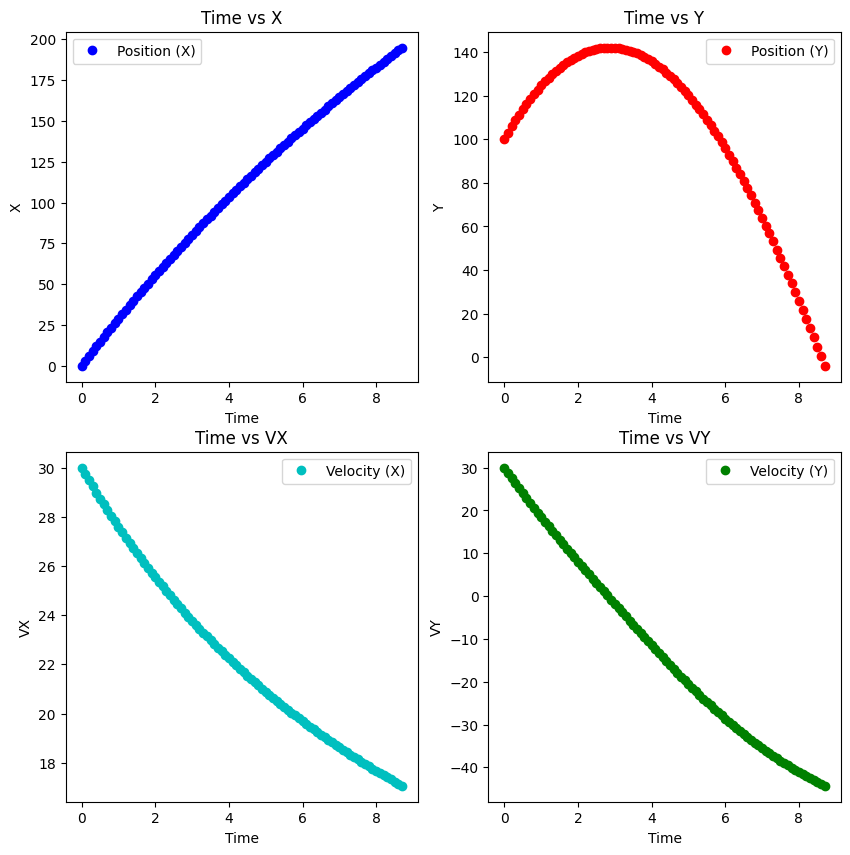

In [293]:
# plot your results
plt.figure(figsize=(10,10))
# time vs. x
plt.subplot(2,2,1)
plt.plot(t,x,'bo', label='Position (X)')
plt.title('Time vs X')
plt.xlabel('Time')
plt.ylabel('X')
plt.legend()
# time vs. y
plt.subplot(2,2,2)
plt.plot(t,y,'ro',label='Position (Y)')
plt.title('Time vs Y')
plt.xlabel('Time')
plt.ylabel('Y')
plt.legend()
# time vs. vx
plt.subplot(2,2,3)
plt.plot(t,vx,'co',label='Velocity (X)')
plt.title('Time vs VX')
plt.xlabel('Time')
plt.ylabel('VX')
plt.legend()
# time vs. vy
plt.subplot(2,2,4)
plt.plot(t,vy,'go',label='Velocity (Y)')
plt.title('Time vs VY')
plt.xlabel('Time')
plt.ylabel('VY')
plt.legend()

# Exploring Range

(5 points)

* Make a graph of y vs x for different starting angles

* use the following values, and make a loop to run through the different values of theta
```
theta0_deg = np.arange(15,90,15)
```

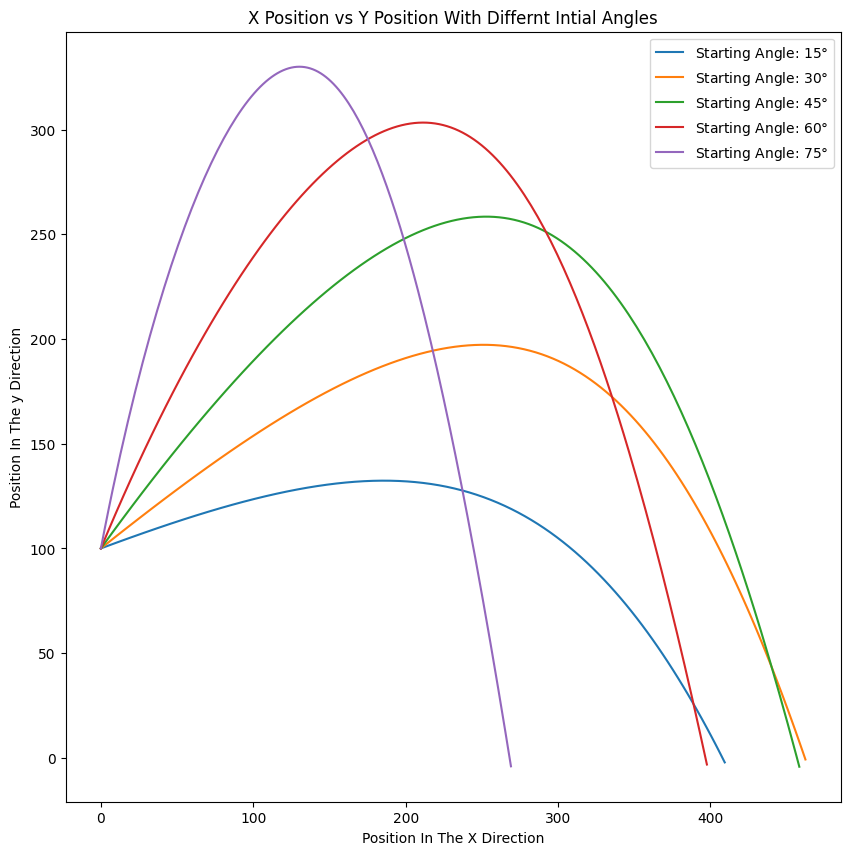

In [294]:
#
plt.figure(figsize=(10,10))
v = 100
theta0_deg = np.arange(15,90,15)
for i in range(len(theta0_deg)):
  theta0 = np.radians(theta0_deg)
  v0x = v * np.cos(theta0[i])
  v0y = v * np.sin(theta0[i])
  t1, x1, y1, vx1, vy1 = calculate(x0,y0,v0x,v0y,dt,myB2,m)
  plt.plot(x1,y1,label=f'Starting Angle: {theta0_deg[i]}$\degree$')
plt.title('X Position vs Y Position With Differnt Intial Angles')
plt.xlabel('Position In The X Direction')
plt.ylabel('Position In The y Direction')
plt.legend()

# Summary Questions

* How does the range vary with the initial angle of the projectile?


* Compare the range values for with and without air resistance.